<a href="https://colab.research.google.com/github/Deeya18/Customer_classification/blob/main/Customer_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# prompt: import numpy as np

import numpy as np
import pandas as pd
np.random.seed(42)
n_customers = 500
ages = np.random.randint(18, 70, n_customers)
genders = np.random.randint(0,2, n_customers)
purchase_freq = np.random.poisson(3,n_customers)
income = np.random.normal(50, 15, n_customers)
churn = ((income<40) & (purchase_freq < 3)).astype(int)
customer_data = pd.DataFrame({
    'Age': ages,
    'Gender': genders,
    'Income': income,
    'Purchase Frequency': purchase_freq,
    'Churn':churn
})

customer_data.to_csv('customers.csv', index=False)

print("Customer data created and saved to customers.csv")
print(customer_data.head())

Customer data created and saved to customers.csv
   Age  Gender     Income  Purchase Frequency  Churn
0   56       1  38.113701                   5      0
1   69       0  45.380577                   4      0
2   46       0  21.595780                   1      1
3   32       1  53.199406                   1      0
4   60       0  50.018082                   1      0


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

df = pd.read_csv('customers.csv')
df.head()

,Age,Gender,Income,Purchase Frequency,Churn
0,56,1,38.113701,5,0
1,69,0,45.380577,4,0
2,46,0,21.595780,1,1
3,32,1,53.199406,1,0
4,60,0,50.018082,1,0


In [7]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 500 non-null    int64  
 1   Gender              500 non-null    int64  
 2   Income              500 non-null    float64
 3   Purchase Frequency  500 non-null    int64  
 4   Churn               500 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 19.7 KB


,0
Age,0
Gender,0
Income,0
Purchase Frequency,0
Churn,0


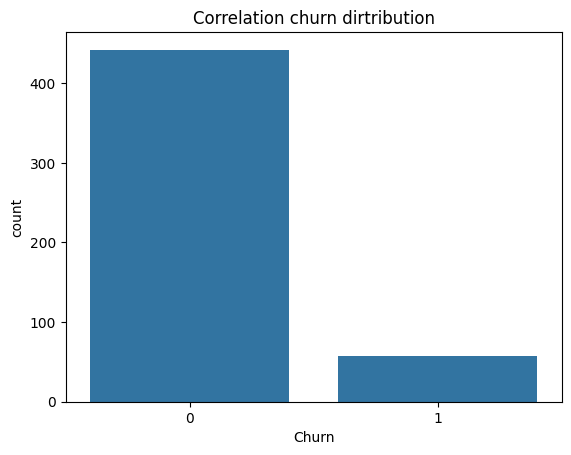

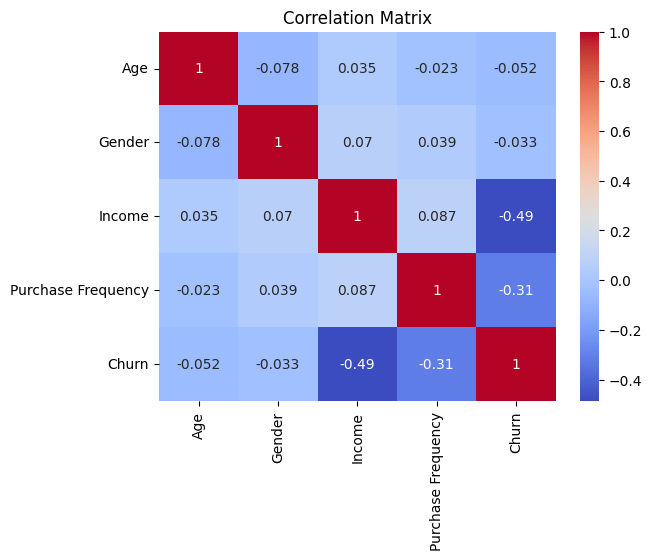

In [10]:
sns.countplot(x='Churn', data=df)
plt.title('Correlation churn dirtribution')
plt.show()

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [11]:
x = df.drop('Churn', axis=1)
y = df['Churn']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [12]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [16]:
y_pred = model.predict(x_test)

print("Accuracy Score:",accuracy_score(y_test, y_pred))


cm = (confusion_matrix(y_test, y_pred))
print("Confusion Matrix:")
print(cm)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy Score: 0.95
Confusion Matrix:
[[89  5]
 [ 0  6]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        94
           1       0.55      1.00      0.71         6

    accuracy                           0.95       100
   macro avg       0.77      0.97      0.84       100
weighted avg       0.97      0.95      0.96       100



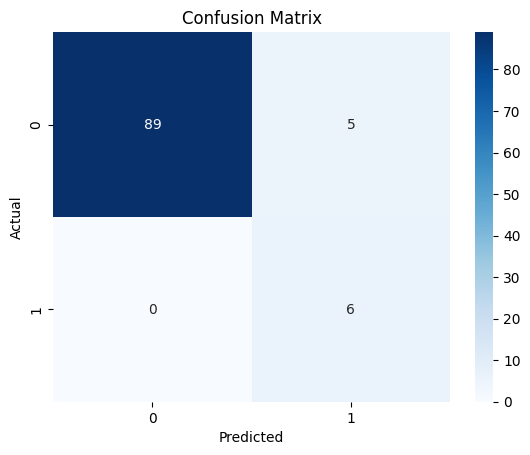

In [15]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [17]:
# New sample Customer

new_customer = pd.DataFrame({
    'Age': [35],
    'Gender': [1],
    'Income': [60],
    'Purchase Frequency': [2]
})

prediction = model.predict(new_customer)[0]
print("Prediction:", prediction)
if prediction == 1:
    print("Customer is likely to make a purchase.")
else:
    print("Customer is unlikely to make a purchase.")

Prediction: 0
Customer is unlikely to make a purchase.


In [19]:
 #Logistic Regression Mathematics Explained

# Logistic Regression predicts probability of churn using this formula:
# P(y=1) = 1 / (1 + e^-(b0 + b1*x1 + b2*x2 + ... + bn*xn))



# Let's take one customer example:
# Features: Age, Monthly Balance, Number of Transactions
age = 45             # x1
balance = 25000      # x2
transactions = 6     # x3

# Example coefficients learned by the model (for explanation)
b0 = -4              # Intercept
b1 = 0.05            # Coefficient for age
b2 = 0.0001          # Coefficient for balance
b3 = 0.3             # Coefficient for transactions

# Step 1: Calculate linear score (z)
z = b0 + (b1 * age) + (b2 * balance) + (b3 * transactions)
print("Linear score (z):", round(z, 4))

# Step 2: Apply sigmoid function to convert z to probability
probability = 1 / (1 + np.exp(-z))
print("Predicted probability of churn:", round(probability, 4))

# Step 3: Predict churn based on threshold 0.5
if probability > 0.5:
    print(" This customer is likely to CHURN.")
else:
    print(" This customer is likely to STAY.")


Linear score (z): 2.55
Predicted probability of churn: 0.9276
 This customer is likely to CHURN.
